**Crop Recommendation:**

Based on predicted rainfall, soil contents and weather parameters the system will recommend the most suitable crop for cultivation. This system also provides details about required fertilizers like Nitrogen(N), Phosphorus (P) and potassium(K) in Kg per hectare and display the required seed for a cultivation in Kg per acre for recommended crop.This system as contain some other feature such as display thecurrent market price and approximated yield in quintal per acre for recommended crop. Those all details will helps to farmers for choosing the most profitable crop.

Crop prediction is an essential task for the decision-makers at national and regional levels for rapid decision-making. An accurate crop yield prediction model can help farmers to decide on what to grow and when to grow.The dataset contains following 21 crops:
**['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']**

In [1]:
#pandas
import pandas as pd 

#matplotlib
import matplotlib.pyplot as plt 

#seaborn
import seaborn as sns

#numpy
import numpy as np

#sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### **Read Dataset**

In [2]:
crop_df = pd.read_csv('Crop_recommendation.csv')
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### **Shape of Dataset**

In [3]:
crop_df.shape

(2200, 8)

### Dataset contains 2200 records and 8 columns.

### **Check whether Dataset contains NULL values or not**

In [4]:
crop_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### There are no null values present in our dataset.

In [5]:
crop_df['no_label'] = pd.Categorical(crop_df.label).codes

### **EDA**

### 1]Nitrogen

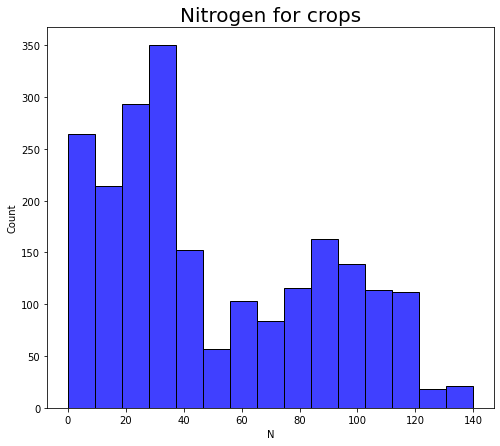

In [6]:
plt.figure(figsize=(8,7))
sns.histplot(x='N',data=crop_df,color='b');
plt.title("Nitrogen for crops",{'fontsize':20});

### Nitrogen is an essential nutrient for plant growth, development and reproduction.Soil nitrogen exists in three general forms: organic nitrogen compounds, ammonium (NH₄⁺) ions and nitrate (NO₃⁻) ions.

### 2]Potassium 

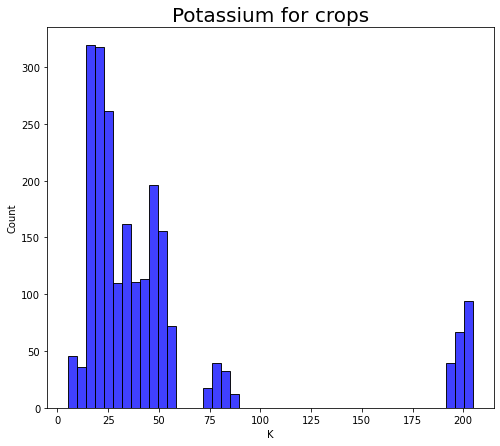

In [7]:
plt.figure(figsize=(8,7))
sns.histplot(x='K',data=crop_df,color='b');
plt.title("Potassium for crops",{'fontsize':20});

### Importance of Potassium in Plants:
### The rate of respiration by plants is largely the determining factor for proper uptake and transport of potassium by plants.
### Potassium also facilitates protein and starch synthesis in plants.
### It activates enzymes responsible for specific functions. 

### 3]Phosphorus 

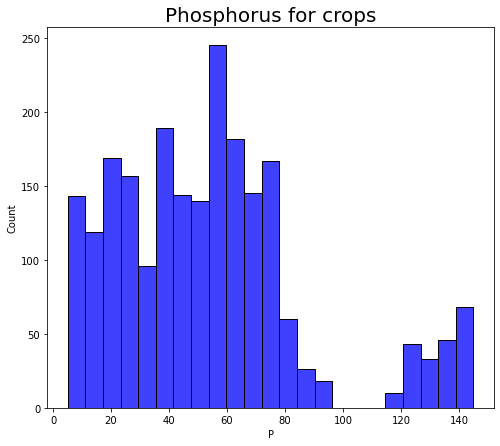

In [8]:
plt.figure(figsize=(8,7))
sns.histplot(x='P',data=crop_df,color='b');
plt.title("Phosphorus for crops",{'fontsize':20});

### Importance of Phosphorus to Plants :
### Phosphorus is important for cell division and development of new tissues.
### Adding phosphrous to plants helps for root growth.
### It also recomend for early growth of plants.

In [9]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'no_label'],
      dtype='object')

### 4]Temperature

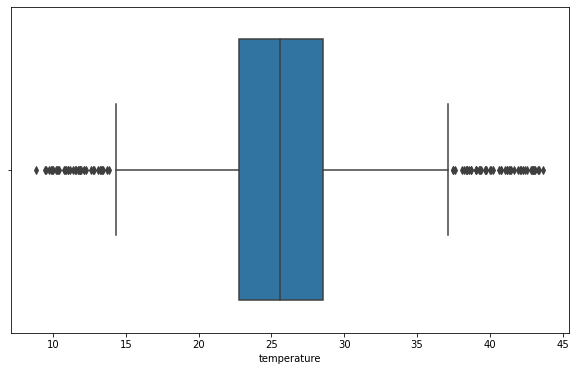

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x=crop_df.temperature);

### 5]Humidity

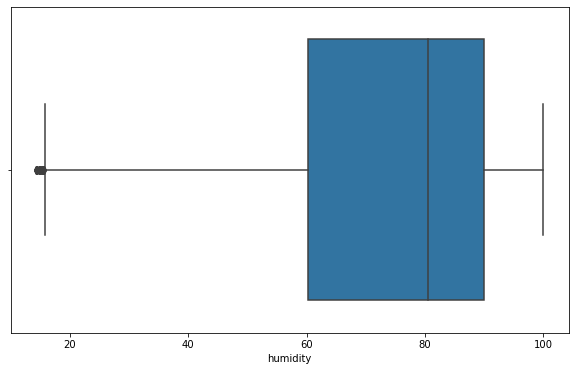

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x=crop_df.humidity);

### 6]PH

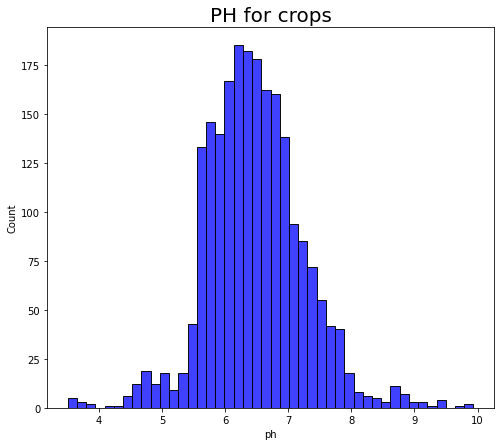

In [12]:
plt.figure(figsize=(8,7))
sns.histplot(x='ph',data=crop_df,color='b');
plt.title("PH for crops",{'fontsize':20});

### pH stands for ‘potential of hydrogen’ and refers to the amount of hydrogen found in the soil.
### Importance of PH to plants :
### pH can affect a plant’s ability to absorb vital nutrients from the soil. If pH is too acidic or alkaline, this can stunt or retard root growth and consequently, restrict water and nutrient uptake.

### 7]Rainfall

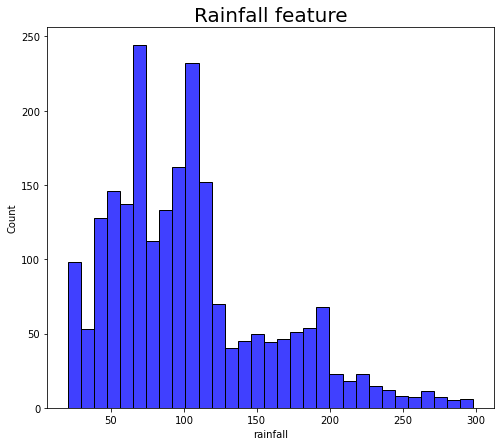

In [13]:
plt.figure(figsize=(8,7))
sns.histplot(x='rainfall',data=crop_df,color='b');
plt.title("Rainfall feature",{'fontsize':20});

### Split data

In [14]:
X = crop_df.drop(['label','no_label'],axis=1)
y = crop_df.no_label

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Feature Scaling

In [16]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1929,108,36,19,22.782496,77.512350,7.238567,64.614442
503,4,43,18,29.029553,61.093875,8.840656,72.980166
2039,90,48,45,24.064757,71.313429,6.509175,153.639021
1034,94,91,51,29.160934,76.674842,5.618094,109.575944
1304,93,22,52,26.587407,81.325632,6.932740,41.875400


In [17]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### Build Model

In [18]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  97.04545454545455 %
Accuracy Score for Random Forest is :  99.77272727272727 %
Accuracy Score for Support Vector Machine is :  98.86363636363636 %


**Random Forest Gives higher accuracy as compared to other models.**

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
y_pred = rf.predict(X_test)

crop_labels = {0:'apple',1:'banana',2:'blackgram',3:'chickpea',4:'coconut',5:'coffee',6:'cotton',7:'grapes',8:'jute',9:'kidneybeans',
9:'lentil',10:'maize',12:'mango',13:'mothbeans',14:'mungbean',15:'muskmelon',16:'orange',17:'papaya',18:'pigeonpeas',19:'pomegranate',20:'rice',21:'watermelon'}

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        26
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        27
          16       1.00      1.00      1.00        24
          17       1.00    

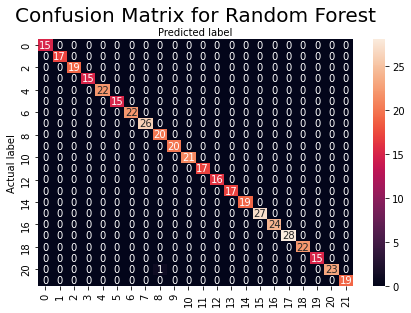

In [22]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for Random Forest', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()